<a href="https://colab.research.google.com/github/xg6144/Machine_Practice/blob/main/TensorLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Layer Explaination

In [ ]:
import tensorflow as tf

## Input Image  
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드  
- os
- glob
- matplotlib

In [ ]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras import datasets

(train_input, train_target), (test_input, test_target) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


이미지를 열어봤으니 무엇을 확인 해볼까요?

In [ ]:
# 이미지 shape 확인
image = train_input[0]
image.shape

(28, 28)

차원 수를 확인 했는데 어떤 결과가 나왔나요? 

In [ ]:
# 차원 수 높이기 
image = image[tf.newaxis,...,tf.newaxis]
image.shape

(1, 28, 28, 1)

# Feature Extraction

## Convolution

filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)  
kernel_size: filter(Weight)의 사이즈  
strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [ ]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

(3, 3) 대신에 3으로도 대체 가능

In [ ]:
tf.keras.layers.Conv2D(3,3,1,'SAME')

### Visualization

- tf.keras.layers.Conv2D

In [ ]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [ ]:
layer = tf.keras.layers.Conv2D(3,3,1,'SAME')

In [ ]:
output = layer(image)

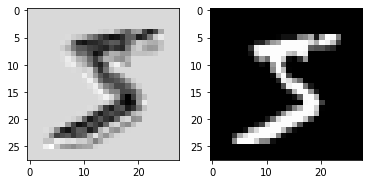

In [ ]:
plt.subplot(1,2,1)
plt.imshow(output[0, :, :, 0], 'gray')
plt.subplot(1,2,2)
plt.imshow(image[0, :, :, 0], 'gray')
plt.show()

weight 불러오기

- layer.get_weights()

In [ ]:
weight = layer.get_weights()

In [ ]:
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

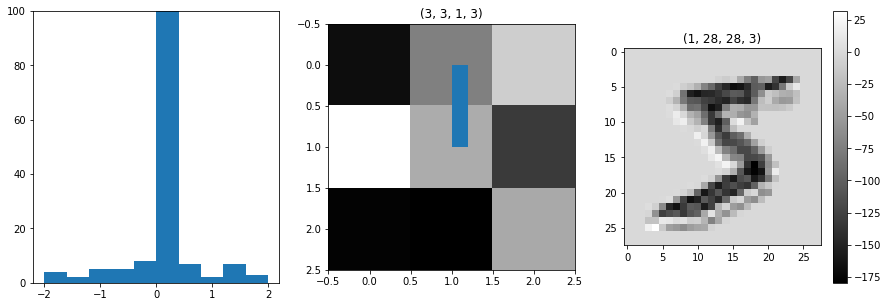

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(1,3,2)
plt.hist(weight[0].shape)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(1,3,3)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

In [ ]:
import numpy as np

In [ ]:
np.min(output), np.max(output)

(-179.72165, 219.938)

## Activation Function

In [ ]:
tf.keras.layers.ReLU()

In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

np.min(act_output), np.max(act_output)

(0.0, 219.938)

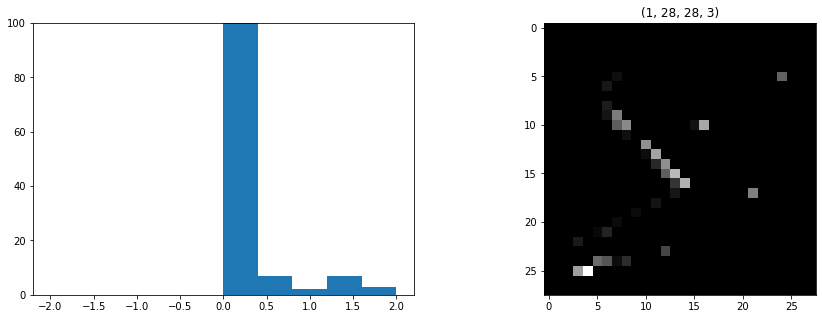

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0],'gray')
plt.show()

## Pooling

- tf.keras.layers.MaxPool2D

In [ ]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [ ]:
act_output.shape

TensorShape([1, 28, 28, 3])

In [ ]:
pool_output.shape

TensorShape([1, 14, 14, 3])

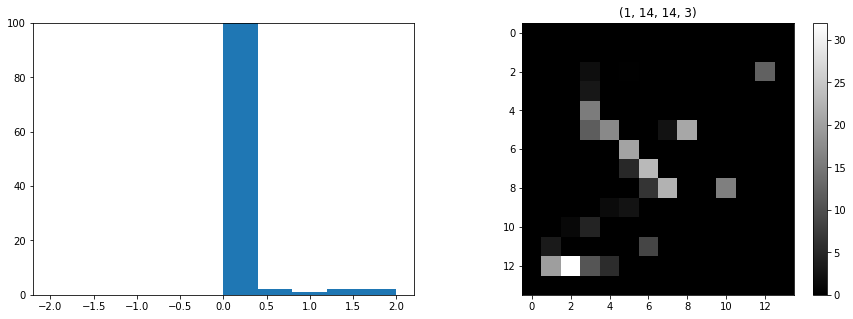

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# Fully Connected

## Flatten

- tf.keras.layers.Flatten()

In [ ]:
tf.keras.layers.Flatten()

In [ ]:
layer = tf.keras.layers.Flatten()

In [ ]:
flatten = layer(output)

In [ ]:
flatten.shape

TensorShape([1, 2352])

In [ ]:
print(flatten)

tf.Tensor([[0. 0. 0. ... 0. 0. 0.]], shape=(1, 2352), dtype=float32)


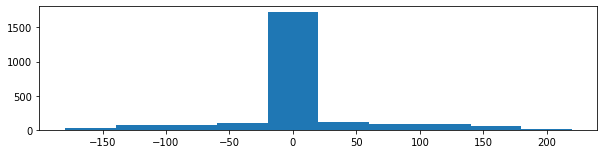

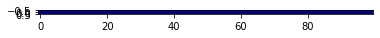

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.show()
plt.subplot(212)
plt.imshow(flatten[:,:100], 'jet')
plt.show()

## Dense

- tf.keras.layers.Dense

In [ ]:
tf.keras.layers.Dense(32, activation='relu') #내보낼 유닛의 개수: 32

In [ ]:
layer = tf.keras.layers.Dense(32, activation='relu')

In [ ]:
dense = layer(output)
dense.shape

TensorShape([1, 28, 28, 32])

In [ ]:
layer_2 = tf.keras.layers.Dense(10, activation='relu')
output_ex = layer_2(dense)
output_ex.shape

TensorShape([1, 28, 28, 10])

## DropOut

- tf.keras.layers.Dropout

In [ ]:
tf.keras.layers.Dropout(0.7)

In [ ]:
layer = tf.keras.layers.Dropout(0.7)

In [ ]:
drop_out = layer(output)

In [ ]:
drop_out.shape

TensorShape([1, 28, 28, 3])

# Build Model

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_shape = (28, 28, 1)
num_classes = 10

In [ ]:
inputs = layers.Input(shape=input_shape)

net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#Convolution Block

net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#Fully Connected

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs = net, name = 'Basic_CNN')

In [ ]:
model

## Summary

In [ ]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0 